### Данные

In [1]:
m = 225;

In [2]:
J = 12.5;

### Линеаризованные уравнения:

m*y1" = (f1 + delta_f1) + f3*alpha

m*y2" = -(f1 + delta_f1)*alpha + f3

J*w" = M + delta_M

### Обезразмеривание:

In [3]:
L = 1;

In [4]:
phi = 1;

In [5]:
Ti = 20;

y1 и y2 умножаются на L*m/T^2

w умножаeтся на phi*m/T^2

Уравнения:
y1" = (up1 + v1) + u3*alpha

y2" = -(up1 + v1)*alpha + u3

w" = M' + v2

f3 -> u3 -> u3 = f3 * t^2 / L*m

delta_f1 -> v1 = delta_f1 * t^2 / L*m

f1 -> up1 = f1 * t^2 / L*m

M -> M' = M * t^2 / phi*m

delta_M -> v2 = delta_M * t^2 / phi*m


Форма коши:
y1' = y2

y2' = (up1 + v1) + u3*alpha

y3' = y4

y4' = -(up1 + v1)*alpha + u3

y5' = y6

y6' = M' + v2

В отклонениях:
x = y' - y* 

y* - система без возмущений

x1' = x2

x2' = v1

x3' = x4

x4' = -up1*x5 + u3

x5' = x6

x6' = v2

### Перевод значений:

    u3 = f3 * t^2 / L*m                   \ f3 = u3 * L*m  / t^2
                                          \ 
    v1 = delta_f1 * t^2 / L*m             \ delta_f1 = v1 * L*m  / t^2
                                          \
    up1 = f1 * t^2 / L*m                  \ f1 = up1 * L*m  / t^2
                                          \
    M' = M * t^2 / phi*m                  \ M = M' * phi*m  / t^2
                                          \
    v2 = delta_M * t^2 / phi*J            \ delta_M = v2 * phi*J  / t^2

    x' = Ax + Bu + Cv
    s' = As + Cv
    q' = Aq - Bu

### Листок

In [6]:
listSpeed = {20, 0, -20}

{20, 0, -20}

In [7]:
listX0 = {0, 0, -20, 0, 0, 0}

{0, 0, -20, 0, 0, 0}

In [8]:
f3 = 4;

In [9]:
listA = {0.004, -0.005, 0, -0.2}

{0.004, -0.005, 0, -0.2}

In [10]:
listB = {0.004, 0, 0, -0.5}

{0.004, 0, 0, -0.5}

In [11]:
listV = {0.0042, 0, -0.03, 0}

{0.0042, 0, -0.03, 0}

In [12]:
listG = {0.004, 0, 0, 0.2}

{0.004, 0, 0, 0.2}

In [13]:
nonDimL[inDimL_] := inDimL * Ti*Ti / (L*m);

In [14]:
nonDimPhi[inDimPhi_] := inDimPhi * Ti*Ti / (phi*J);

In [15]:
inDimL[nonDimL_] := nonDimL * (L*m) / (Ti*Ti);

In [16]:
inDimPhi[nonDimPhi_] := nonDimPhi * (phi*J) / (Ti*Ti);

In [17]:
sys[x1r_, x2r_, x3r_, x4r_, x5r_, x6r_, 
        v1_, up1_, u3_, v2_, t0_, tk_] := NDSolveValue[{x1'[t] == x2[t],
                    x2'[t] == v1,
                    x3'[t] == x4[t],
                    x4'[t] == -up1*x5[t] + u3,
                    x5'[t] == x6[t],
                    x6'[t] == v2,
                    x1[t0] == x1r, 
                    x2[t0] == x2r, 
                    x3[t0] == x3r, 
                    x4[t0] == x4r, 
                    x5[t0] == x5r, 
                    x6[t0] == x6r},
                    {x1[tk], x2[tk], x3[tk], x4[tk], x5[tk], x6[tk]},
                    {t, 0, 3}]  

In [18]:
listSpeedND = {nonDimL[listSpeed[[1]]], nonDimL[listSpeed[[2]]], nonDimL[listSpeed[[3]]]};

In [19]:
f3ND = nonDimL[f3];

320
{0, 0, -(---), 0, 0., 0.}
          9
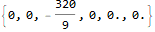

In [20]:
listX0ND = {nonDimL[listX0[[1]]], nonDimL[listX0[[2]]], nonDimL[listX0[[3]]], nonDimL[listX0[[4]]], nonDimPhi[listX0[[5]]], nonDimPhi[listX0[[6]]]}

### В отклонениях для а)

In [21]:
listAND = {nonDimPhi[listA[[1]]], nonDimPhi[listA[[2]]], nonDimL[listA[[3]]], nonDimL[listA[[4]]]}

{0.128, -0.16, 0, -0.355556}

In [22]:
ARacing = sys[listX0ND[[1]], listX0ND[[2]], listX0ND[[3]], listX0ND[[4]], listX0ND[[5]], listX0ND[[6]],
       listAND[[3]], listSpeedND[[1]], f3ND, listAND[[1]], 0, 1]

{0., 0., -32.1896, 6.35259, 0.064, 0.128}

In [23]:
ADrifting = sys[ARacing[[1]], ARacing[[2]], ARacing[[3]], ARacing[[4]], ARacing[[5]], ARacing[[6]], 
        0, listSpeedND[[2]], 0, 0, 1, 2]

{0., 0., -25.837, 6.35259, 0.192, 0.128}

In [24]:
ABraking = sys[ADrifting[[1]], ADrifting[[2]], ADrifting[[3]], ADrifting[[4]], ADrifting[[5]], ADrifting[[6]], 
        listAND[[4]], listSpeedND[[3]], f3ND, listAND[[2]], 2, 3]

{-0.177778, -0.355556, -11.994, 21.6178, 0.24, -0.032}

In [25]:
AInDim = {inDimL[ABraking[[1]]], inDimL[ABraking[[2]]], inDimL[ABraking[[3]]], inDimL[ABraking[[4]]], inDimPhi[ABraking[[5]]], inDimPhi[ABraking[[6]]]}

{-0.1, -0.2, -6.74663, 12.16, 0.0075, -0.001}

### Уравнения q

In [26]:
qRacing = sys[listX0ND[[1]], listX0ND[[2]], listX0ND[[3]], listX0ND[[4]], listX0ND[[5]], listX0ND[[6]],
       0, listSpeedND[[1]], f3ND, 0, 0, 1]

{0., 0., -32., 7.11111, 0., 0.}

In [27]:
qDrifting = sys[qRacing[[1]], qRacing[[2]], qRacing[[3]], qRacing[[4]], qRacing[[5]], qRacing[[6]], 
        0, listSpeedND[[2]], 0, 0, 1, 2]

{0., 0., -24.8889, 7.11111, 0., 0.}

In [28]:
qBraking = sys[qDrifting[[1]], qDrifting[[2]], qDrifting[[3]], qDrifting[[4]], qDrifting[[5]], qDrifting[[6]], 
        0, listSpeedND[[3]], -f3ND, 0, 2, 3]

-16
{0., 0., -21.3333, -5.55112 10   , 0., 0.}

In [29]:
qInDim = {inDimL[qBraking[[1]]], inDimL[qBraking[[2]]], inDimL[qBraking[[3]]], inDimL[qBraking[[4]]], inDimPhi[qBraking[[5]]], inDimPhi[qBraking[[6]]]}

-16
{0., 0., -12., -3.1225 10   , 0., 0.}

### Уравнения на s для а)

In [30]:
listAND = {nonDimPhi[listA[[1]]], nonDimPhi[listA[[2]]], nonDimL[listA[[3]]], nonDimL[listA[[4]]]}

{0.128, -0.16, 0, -0.355556}

In [31]:
SARacing = sys[listX0ND[[1]], listX0ND[[2]], listX0ND[[3]], listX0ND[[4]], listX0ND[[5]], listX0ND[[6]],
       listAND[[3]], listSpeedND[[1]], 0, listAND[[1]], 0, 1]

{0., 0., -35.7451, -0.75852, 0.064, 0.128}

In [32]:
SADrifting = sys[SARacing[[1]], SARacing[[2]], SARacing[[3]], SARacing[[4]], SARacing[[5]], SARacing[[6]], 
        0, listSpeedND[[2]], 0, 0, 1, 2]

{0., 0., -36.5036, -0.75852, 0.192, 0.128}

In [33]:
SABraking = sys[SADrifting[[1]], SADrifting[[2]], SADrifting[[3]], SADrifting[[4]], SADrifting[[5]], SADrifting[[6]], 
        listAND[[4]], listSpeedND[[3]], 0, listAND[[2]], 2, 3]

{-0.177778, -0.355556, -33.3273, 7.39556, 0.24, -0.032}

In [34]:
SABraking - qBraking

{-0.177778, -0.355556, -11.994, 7.39556, 0.24, -0.032}

In [35]:
SAInDim = {inDimL[SABraking[[1]]], inDimL[SABraking[[2]]], inDimL[SABraking[[3]]], inDimL[SABraking[[4]]], inDimPhi[SABraking[[5]]], inDimPhi[SABraking[[6]]]}

{-0.1, -0.2, -18.7466, 4.16, 0.0075, -0.001}

### Уравнения на s для б)

In [36]:
listBND = {nonDimPhi[listB[[1]]], nonDimPhi[listB[[2]]], nonDimL[listB[[3]]], nonDimL[listB[[4]]]}

{0.128, 0., 0, -0.888889}

In [37]:
SBRacing = sys[listX0ND[[1]], listX0ND[[2]], listX0ND[[3]], listX0ND[[4]], listX0ND[[5]], listX0ND[[6]],
       listBND[[3]], listSpeedND[[1]], 0, listBND[[1]], 0, 1]

{0., 0., -35.7451, -0.75852, 0.064, 0.128}

In [38]:
SBDrifting = sys[SBRacing[[1]], SBRacing[[2]], SBRacing[[3]], SBRacing[[4]], SBRacing[[5]], SBRacing[[6]], 
        0, listSpeedND[[2]], 0, 0, 1, 2]

{0., 0., -36.5036, -0.75852, 0.192, 0.128}

In [39]:
SBBraking = sys[SBDrifting[[1]], SBDrifting[[2]], SBDrifting[[3]], SBDrifting[[4]], SBDrifting[[5]], SBDrifting[[6]], 
        listBND[[4]], listSpeedND[[3]], 0, listBND[[2]], 2, 3]

{-0.444444, -0.888889, -33.0903, 8.3437, 0.32, 0.128}

In [40]:
SBInDim = {inDimL[SBBraking[[1]]], inDimL[SBBraking[[2]]], inDimL[SBBraking[[3]]], inDimL[SBBraking[[4]]], inDimPhi[SBBraking[[5]]], inDimPhi[SBBraking[[6]]]}

{-0.25, -0.5, -18.6133, 4.69333, 0.01, 0.004}

### Уравнения на s для в)

In [41]:
listVND = {nonDimPhi[listV[[1]]], nonDimPhi[listV[[2]]], nonDimL[listV[[3]]], nonDimL[listV[[4]]]}

{0.1344, 0., -0.0533333, 0}

In [42]:
SVRacing = sys[listX0ND[[1]], listX0ND[[2]], listX0ND[[3]], listX0ND[[4]], listX0ND[[5]], listX0ND[[6]],
       listVND[[3]], listSpeedND[[1]], 0, listVND[[1]], 0, 1]

{-0.0266667, -0.0533333, -35.7546, -0.796446, 0.0672, 0.1344}

In [43]:
SVDrifting = sys[SVRacing[[1]], SVRacing[[2]], SVRacing[[3]], SVRacing[[4]], SVRacing[[5]], SVRacing[[6]], 
        0, listSpeedND[[2]], 0, 0, 1, 2]

{-0.08, -0.0533333, -36.551, -0.796446, 0.2016, 0.1344}

In [44]:
SVBraking = sys[SVDrifting[[1]], SVDrifting[[2]], SVDrifting[[3]], SVDrifting[[4]], SVDrifting[[5]], SVDrifting[[6]], 
        listVND[[4]], listSpeedND[[3]], 0, listVND[[2]], 2, 3]

{-0.133333, -0.0533333, -32.967, 8.76089, 0.336, 0.1344}

In [45]:
SVInDim = {inDimL[SVBraking[[1]]], inDimL[SVBraking[[2]]], inDimL[SVBraking[[3]]], inDimL[SVBraking[[4]]], inDimPhi[SVBraking[[5]]], inDimPhi[SVBraking[[6]]]}

{-0.075, -0.03, -18.544, 4.928, 0.0105, 0.0042}

### Уравнения на s для г)

In [46]:
listGND = {nonDimPhi[listG[[1]]], nonDimPhi[listG[[2]]], nonDimL[listG[[3]]], nonDimL[listG[[4]]]}

{0.128, 0., 0, 0.355556}

In [47]:
SGRacing = sys[listX0ND[[1]], listX0ND[[2]], listX0ND[[3]], listX0ND[[4]], listX0ND[[5]], listX0ND[[6]],
       listGND[[3]], listSpeedND[[1]], 0, listGND[[1]], 0, 1]

{0., 0., -35.7451, -0.75852, 0.064, 0.128}

In [48]:
SGDrifting = sys[SGRacing[[1]], SGRacing[[2]], SGRacing[[3]], SGRacing[[4]], SGRacing[[5]], SGRacing[[6]], 
        0, listSpeedND[[2]], 0, 0, 1, 2]

{0., 0., -36.5036, -0.75852, 0.192, 0.128}

In [49]:
SGBraking = sys[SGDrifting[[1]], SGDrifting[[2]], SGDrifting[[3]], SGDrifting[[4]], SGDrifting[[5]], SGDrifting[[6]], 
        listGND[[4]], listSpeedND[[3]], 0, listGND[[2]], 2, 3]

{0.177778, 0.355556, -33.0903, 8.3437, 0.32, 0.128}

In [50]:
SGInDim = {inDimL[SGBraking[[1]]], inDimL[SGBraking[[2]]], inDimL[SGBraking[[3]]], inDimL[SGBraking[[4]]], inDimPhi[SGBraking[[5]]], inDimPhi[SGBraking[[6]]]}

{0.1, 0.2, -18.6133, 4.69333, 0.01, 0.004}

### 1 и 3

In [51]:
q13 = Reverse[{qInDim[[1]], qInDim[[3]]}]

{-12., 0.}

In [52]:
SA13 = Reverse[{SAInDim[[1]], SAInDim[[3]]}]

{-18.7466, -0.1}

In [53]:
SB13 = Reverse[{SBInDim[[1]], SBInDim[[3]]}]

{-18.6133, -0.25}

In [54]:
SV13 = Reverse[{SVInDim[[1]], SVInDim[[3]]}]

{-18.544, -0.075}

In [55]:
SG13 = Reverse[{SGInDim[[1]], SGInDim[[3]]}]

{-18.6133, 0.1}

In [56]:
PointTable = Table[{SA13, SB13, SV13, SG13}]

{{-18.7466, -0.1}, {-18.6133, -0.25}, {-18.544, -0.075}, {-18.6133, 0.1}}

In [57]:
maxR = EuclideanDistance[q13, SA13]

6.74737

-Graphics-
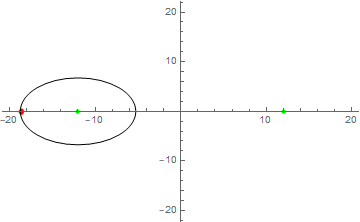

In [58]:
Show[ListPlot[PointTable, PlotStyle -> Red],
    ListPlot[{q13, -q13}, PlotStyle -> Green],
    Graphics[Circle[q13, maxR]],
    PlotRange -> {{-20, 20}, {-20, 20}}, AxesOrigin -> {0, 0}]

-Graphics-
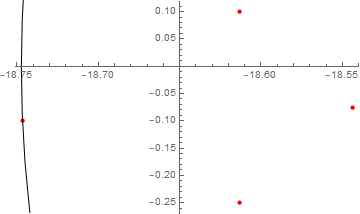

In [59]:
Show[ListPlot[PointTable, PlotStyle -> Red],
    ListPlot[{q13, -q13}, PlotStyle -> Green],
    Graphics[Circle[q13, maxR]],
     AxesOrigin -> {-18.65, 0}]

### Точка равновесия присутствует